# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Alunos: Aldemir Carlos Alves e Ana Luísa Freitas

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geobr as geo
import matplotlib.patches as mpatches
import geopandas as gpd



desmatamento = (
    pd.read_csv('dados/municipio_bioma.csv'))

desmatamento

#geobr python para mapas e identificação de municípios

,ano,id_municipio,bioma,area_total,desmatado,vegetacao_natural,nao_vegetacao_natural,hidrografia
0,2012,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
1,2004,1707207,Amazônia,0,60.0,-60.2,0.2,0.0
2,2015,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
3,2021,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
4,2017,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
...,...,...,...,...,...,...,...,...
150323,2005,1100106,Amazônia,24831,1370.4,19462.8,3853.0,144.8
150324,2021,1100106,Amazônia,24831,1607.5,19225.7,3853.0,144.8
150325,2011,1100106,Amazônia,24831,1431.9,19401.3,3853.0,144.8
150326,2015,1100106,Amazônia,24831,1494.5,19338.7,3853.0,144.8


(-76.23979906784994,
 -26.591086199149935,
 -37.060078841576086,
 9.154426374099277)

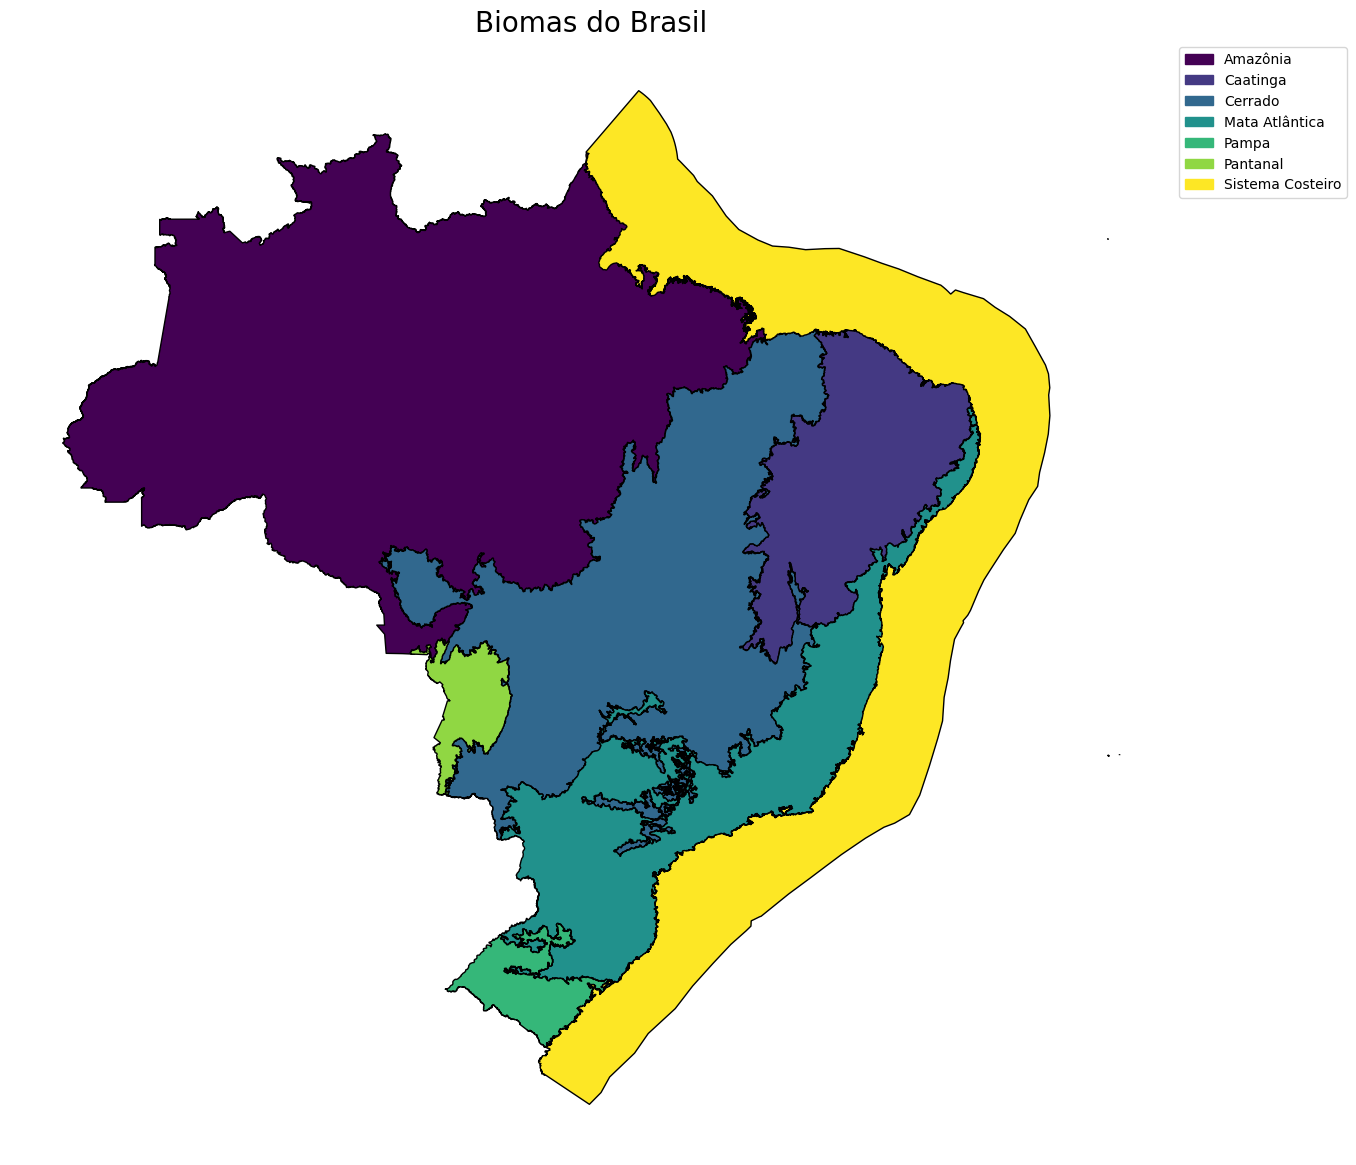

In [2]:
biomas = geo.read_biomes(year=2019) 

colors = ['#440154', '#443983', '#31688E', '#21918C', '#35B779', '#90D743', '#FDE725']  
biomes = ['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal', 'Sistema Costeiro']  

ig, ax = plt.subplots(figsize=(15, 15), dpi=100)
patches = [mpatches.Patch(color=color, label=biome) for color, biome in zip(colors, biomes)]
biomas.plot(cmap='viridis', edgecolor="#000000", ax=ax, legend=True)

ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("Biomas do Brasil", fontsize=20)
ax.axis("off")

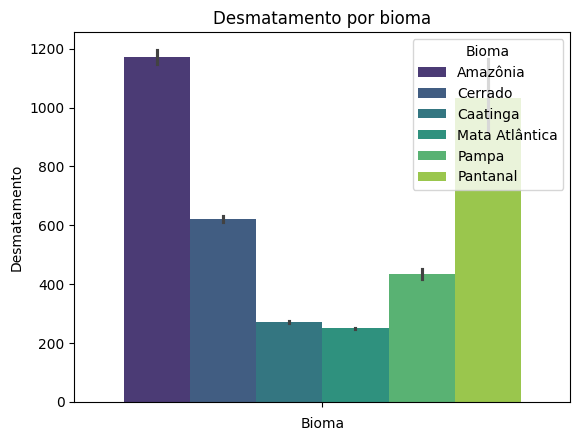

<Figure size 1000x1000 with 0 Axes>

In [3]:
import seaborn as sns

#precisa corrigir

sns.barplot(data=desmatamento, hue='bioma', y='desmatado', palette='viridis')
legend = plt.legend(loc='upper right', title='Bioma')
plt.title('Desmatamento por bioma')
plt.xlabel('Bioma')
plt.ylabel('Desmatamento')
plt.figure(figsize=(10, 10))
plt.show()

In [4]:

# Carrega dados geográficos de todos os municípios
geo_municipios = geo.read_municipality(year=2019, code_muni='all')

# Garantir que o código do município esteja no mesmo formato
geo_municipios['code_muni'] = geo_municipios['code_muni'].astype(int)
desmatamento['id_municipio'] = desmatamento['id_municipio'].astype(int)

# Combinar os dataframes
combined_data = pd.merge(geo_municipios, desmatamento, how='left', left_on='code_muni', right_on='id_municipio')



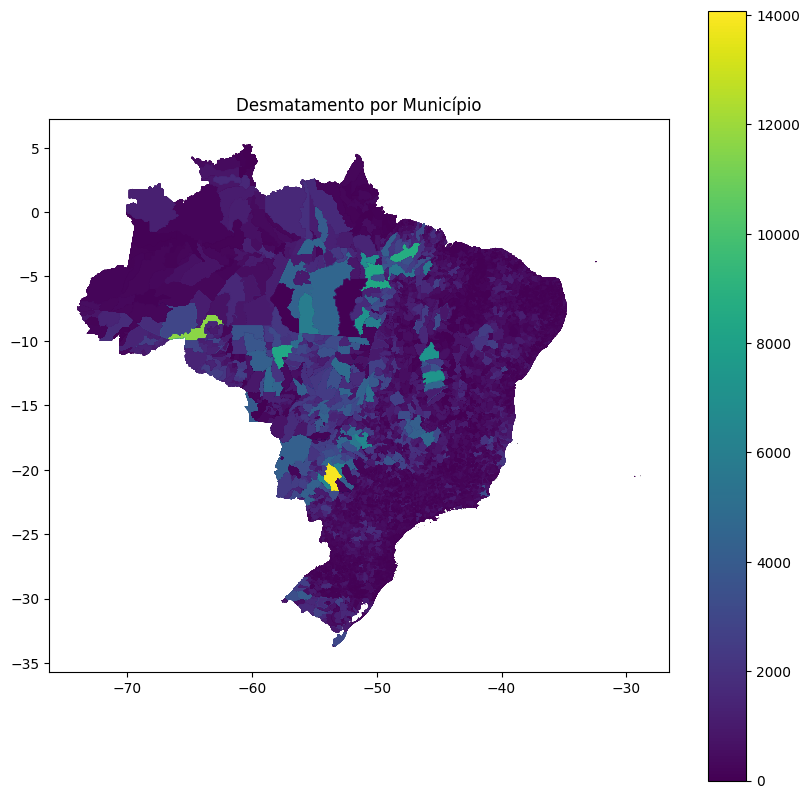

In [5]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
combined_data.plot(column='desmatado', ax=ax, legend=True)
plt.title('Desmatamento por Município')
plt.show()


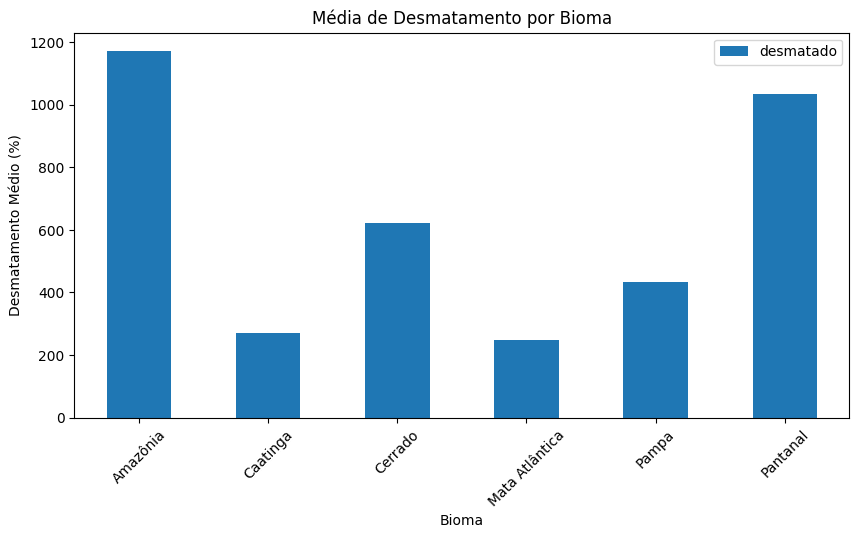

In [6]:
desmatamento_por_bioma = combined_data.groupby('bioma')['desmatado'].mean().reset_index()

# Visualização
fig, ax = plt.subplots(figsize=(10, 5))
desmatamento_por_bioma.plot.bar(x='bioma', y='desmatado', ax=ax)
ax.set_title('Média de Desmatamento por Bioma')
ax.set_ylabel('Desmatamento Médio (%)')
ax.set_xlabel('Bioma')
plt.xticks(rotation=45)
plt.show()

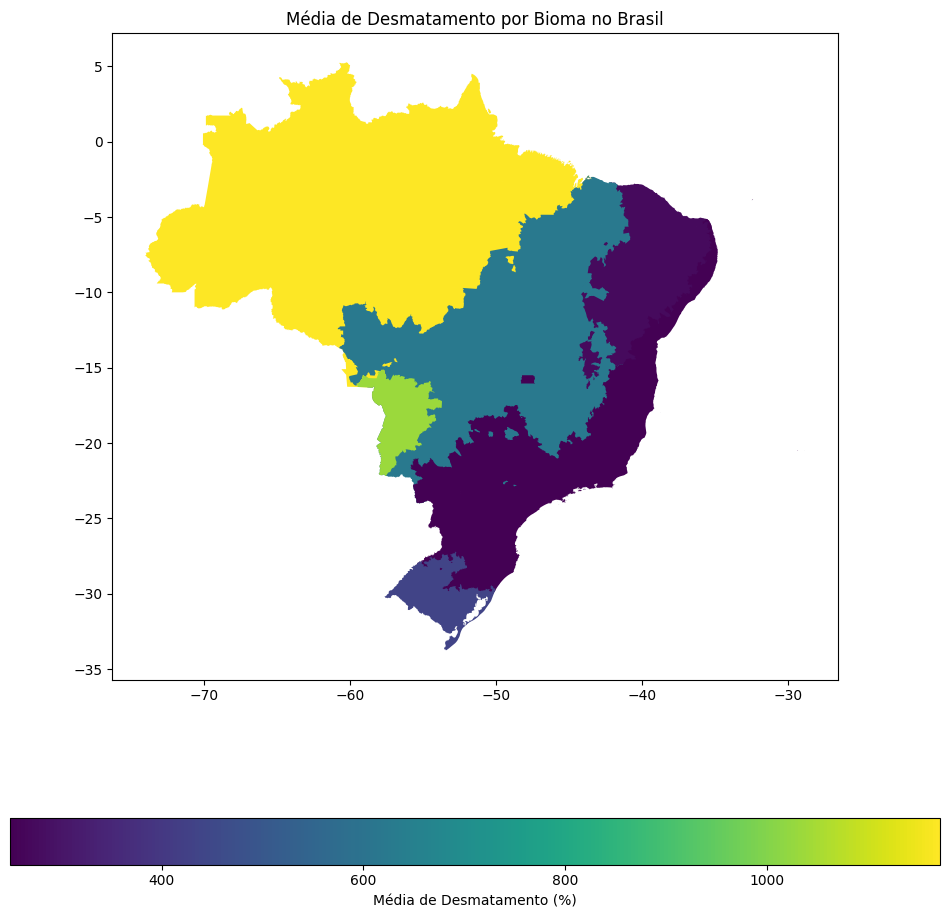

In [7]:
# Agrupar por bioma e calcular a média de desmatamento
desmatamento_bioma = combined_data.dissolve(by='bioma', aggfunc={'desmatado':'mean'})

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
desmatamento_bioma.plot(column='desmatado', ax=ax, legend=True,
                        legend_kwds={'label': "Média de Desmatamento (%)",
                                     'orientation': "horizontal"})
plt.title('Média de Desmatamento por Bioma no Brasil')
plt.show()

KeyError: 'bioma'